<a href="https://colab.research.google.com/github/buenalves/ML-alura-projeto-e-praco/blob/main/MachineLearning_ClassificacaocomSKLearn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calcular se um projeto será realizado com base nas horas que ele exigirá e o preço oferecido pelos serviços.

In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {'unfinished': 'nao_finalizado',
              'expected_hours': 'horas_esperadas',
              'price' : 'preco'}

dados.rename(columns = a_renomear, inplace = True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Por padrão utilizamos o 0: não e o 1: para sim. Nesse caso, na coluna "não_finalizado" o 1 representa não finalizado e o 0 representa finalizado. Para evitar erros, criei a coluna "finalizado".

In [3]:
trocar = {
    0:1,
    1:0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


Para análise dos dados utilizei a biblioteca Seaborn
O gráfico abaixo da uma visão geral dos dados.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

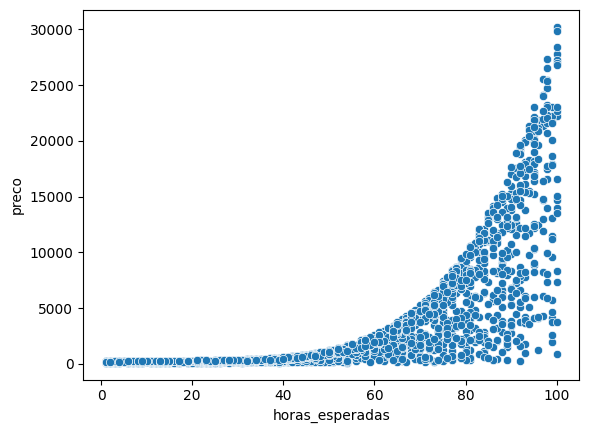

In [6]:
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

In [ ]:
# print('Versão do seaborn -> %s' % sns.__version__)

Versão do seaborn -> 0.12.2


## Para uma análise mais a fundo, o gráfico foi plotado novamente utilizado cores para diferenciar os projetos finalizados e não finalizados.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

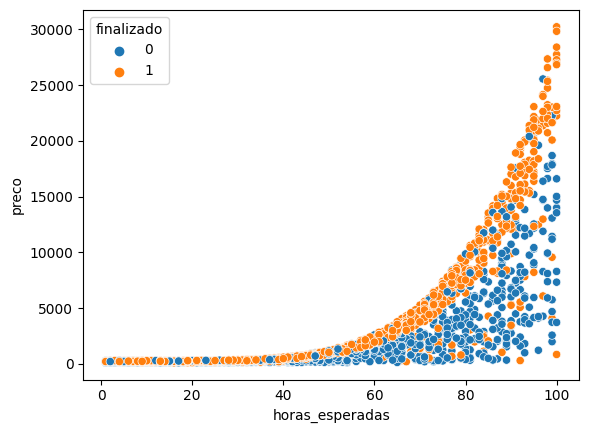

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", hue = 'finalizado',data=dados)

Essa análise também pode ser feita em gráficos separados:

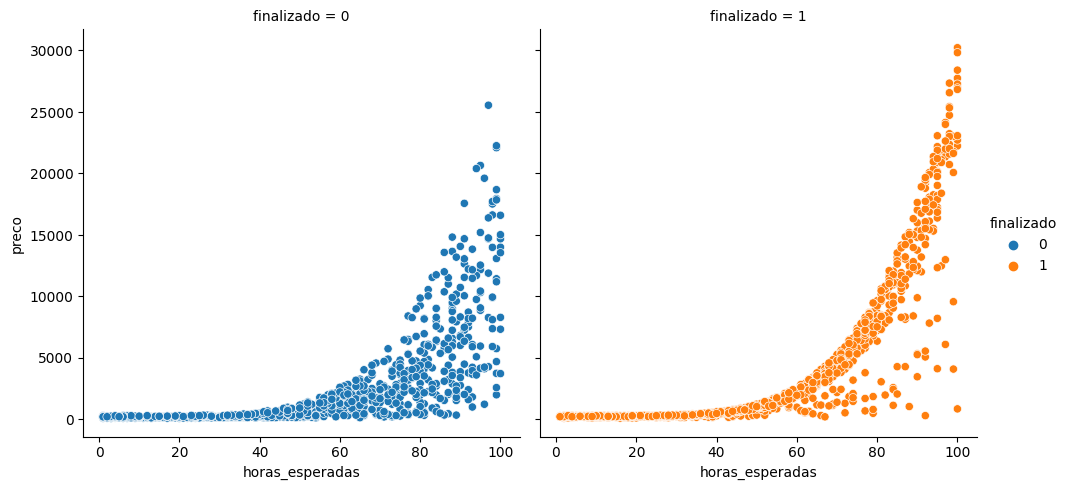

In [8]:
sns.relplot(x="horas_esperadas", y="preco",hue = 'finalizado',col = 'finalizado',data=dados)

# Modelo LinerSVC

## Treinando o modelo
Para treinar o modelo, separamos os dados em x e y.

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
x.shape

(2157, 2)

In [11]:
y.shape

(2157,)

O modelo utilizado é o LinearSVC, tembém usaremos o train_test_split para dividir os dados entre conjuntos de teste e treino.
Para manter o mesmo resultado sempre, configurei o SEED para 20. como o LinearSVC e train_test_split usam o np.random.seed() para randomizar, podemos também apenas configurar esse parâmetro da biblioteca Numpy.

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
SEED = 20
#podemos também configurar o np.random.seed() como SEED, assim não é necessário fixar o random_state em bibliotecas que utilizam o np.random.seed()

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f"Treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]}")

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia foi {acuracia*100:.2f} %")



Treinaremos com 1617 elementos e testaremos com 540
A acuracia foi 47.41 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Verificando a acuracia
Para verificar se a acuracia é boa, utilizei uma linha de base, ou seja, um vetor de resultados chutando que ou todos os projetos são finalizados ou que nenhum projeto foi finalizado.

No caso o vetor linha_de_base foi preenchido inteiramente com 1s (ou seja, chutei que todos os projetos foram finalizados) e obtemos uma acuracia maior do que a do modelo. Portanto, conclui que a utilização do LinearSVC nesse caso é pior do que apenas chutarmos que todos os projetos serão finalizados.

In [15]:
import numpy as np

linha_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, linha_de_base) #(verifica a acuracia se eu chutar que tudo é 1)
print(f"A acuracia foi {acuracia*100:.2f} %")

A acuracia foi 52.59 %


Agora quero entende o comportamento do modelo. considerando todas as combinações possiveis de preco e quantidade de horas, quando o modelo considerou que a previsão de teste_x seria finalizado (1) e quando seria não finalizado (0)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

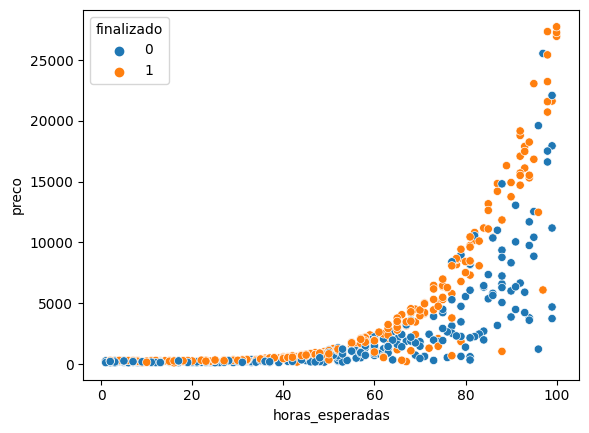

In [16]:
sns.scatterplot(x="horas_esperadas", y="preco", hue = teste_y,data=teste_x)

## Análise do funcionamento do modelo
para isso, preciso que exista um ponto em cada pixel entre o menor e o maior valor de cada um dos eixos.
O código a seguir gera os valores do eixo x e eixo y considerando que entre o menor e maior valor de cada eixo temos 100 pixels

### testando a malha de pontos

In [27]:
# testando meshgrid e ravel

a = np.arange(0, 5, (5-0)/5)
b = np.arange(5, 10, (10-5)/5)

print(a)
print(b)

#cria as coordenadas (a, b) possíveis

[0. 1. 2. 3. 4.]
[5. 6. 7. 8. 9.]
<class 'numpy.ndarray'>


In [29]:
aa, bb = np.meshgrid(a, b)

print(aa)
print(bb)

# repete os valores de aa e bb, para que todas as combinações possam ser feitas.

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7.]
 [8. 8. 8. 8. 8.]
 [9. 9. 9. 9. 9.]]
<class 'numpy.float64'>


In [30]:
lista_a = aa.ravel()
lista_b = bb.ravel()

print(lista_a)
print(lista_b)
# coloca os valores em um único array consecutivo

[0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 0. 1. 2. 3.
 4.]
[5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 9. 9. 9. 9.
 9.]


In [33]:
pontosab = np.c_[lista_a, lista_b]

# gera um conjunto de pontos a partir de (lista_a[i], lista_b[i])
print(pontosab)

[[0. 5.]
 [1. 5.]
 [2. 5.]
 [3. 5.]
 [4. 5.]
 [0. 6.]
 [1. 6.]
 [2. 6.]
 [3. 6.]
 [4. 6.]
 [0. 7.]
 [1. 7.]
 [2. 7.]
 [3. 7.]
 [4. 7.]
 [0. 8.]
 [1. 8.]
 [2. 8.]
 [3. 8.]
 [4. 8.]
 [0. 9.]
 [1. 9.]
 [2. 9.]
 [3. 9.]
 [4. 9.]]


Para unir o x e o y, criando um ponto, utilizei o método meshgrid da biblioteca Numpy. esse método irá retornar uma lista de pontos

### Gerando os pontos possíveis para que o modelo possa preve-los

In [37]:
#como preencher esse grafico com dados que não existem? (os espaços brancos)

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()


y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [38]:
pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max-y_min)/pixels)

In [39]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [40]:
print(pontos)

[[1.000000e+00 1.010000e+02]
 [1.990000e+00 1.010000e+02]
 [2.980000e+00 1.010000e+02]
 ...
 [9.703000e+01 2.746163e+04]
 [9.802000e+01 2.746163e+04]
 [9.901000e+01 2.746163e+04]]


In [44]:
Z = modelo.predict(pontos)
print(Z)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Para plotar, Z deve ter o mesmo formato de xx e yy

In [42]:
xx.shape

(100, 100)

In [43]:
Z = Z.reshape(xx.shape)

In [ ]:
Z.shape

(100, 100)

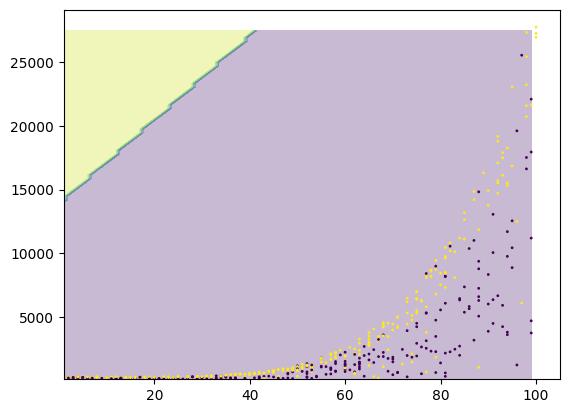

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y,s = 1)

#DECISION BOUNDARY

Avaliando o gráfico podemos ver que o modelo não foi muio eficiente em prever se os projetos serão finalizados ou não.


# Modelo SVC

In [45]:
from sklearn.svm import SVC

np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f"Treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]}")

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia foi {acuracia*100:.2f} %")



Treinaremos com 1617 elementos e testaremos com 540
A acuracia foi 53.15 %


Novamente podemos verificar a acurácia com base no vetor com chute de que todos os projetos serão finalizados.

In [46]:
import numpy as np

linha_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, linha_de_base) #(verifica a acuracia se eu chutar que tudo é 1)
print(f"A acuracia foi {acuracia*100:.2f} %")

A acuracia foi 52.59 %


Com o modelo SVC vemos que a acuracia foi melhor do que a do vetor linha_de_base
Novamente, faremos o gráfico do Decision Boundary para entender o comportamento do modelo. Nesse caso utilizei a mathplot lib para maior controle das caracteristicas

1 100 101 27738
[[1.000000e+00 1.010000e+02]
 [1.990000e+00 1.010000e+02]
 [2.980000e+00 1.010000e+02]
 ...
 [9.703000e+01 2.746163e+04]
 [9.802000e+01 2.746163e+04]
 [9.901000e+01 2.746163e+04]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


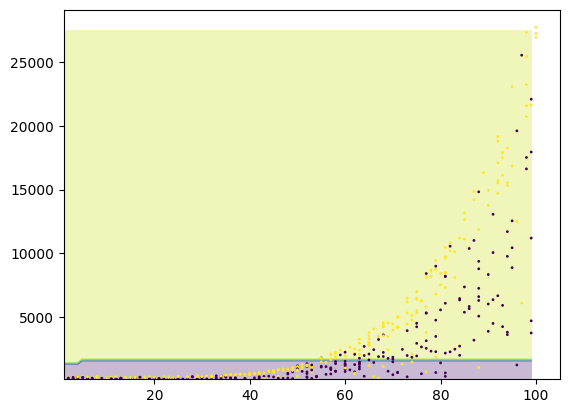

In [47]:
import matplotlib.pyplot as plt

#como preencher esse grafico com dados que não existem? (os espaços brancos)

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()


y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max-y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

print(pontos)

Z = modelo.predict(pontos)

xx.shape
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y,s = 1)

#DECISION BOUNDARY

# Modelo SVC com StandardScaler

Vemos que o modelo ainda não tem uma curva de projetos finalizados similar aos pontos originais. Isso pode ser causado pelas escalas diferentes dos eixos.
A seguir utilizo o StandardScaler para amenizar essa diferença

In [48]:
from sklearn.preprocessing import StandardScaler

np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f"Treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia foi {acuracia*100:.2f} %")


Treinaremos com 1617 elementos e testaremos com 540
A acuracia foi 70.37 %


In [51]:
treino_x
#virou um array com varias listas duplas esses são valores normalidos de preço e horas

array([[ 1.00371462, -0.51176969],
       [-1.2017427 , -0.58099755],
       [-0.18653219, -0.51494346],
       ...,
       [ 0.93370011,  0.57881706],
       [-0.46659026, -0.56671559],
       [ 0.93370011,  0.89282193]])

Para plotar o gráfico precisamos separas os dados do treino_x em 2 vetores

-1.7268515859610238 1.7388670645003195 -0.5974614834809422 4.8846312657487605
[[-1.72685159 -0.59746148]
 [-1.6921944  -0.59746148]
 [-1.65753721 -0.59746148]
 ...
 [ 1.6348955   4.82981034]
 [ 1.66955269  4.82981034]
 [ 1.70420988  4.82981034]]


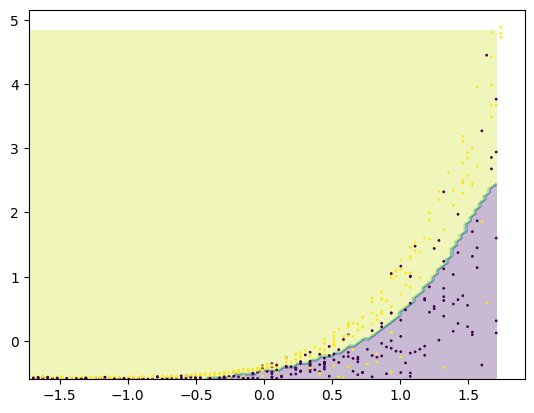

In [50]:
import matplotlib.pyplot as plt

#como preencher esse grafico com dados que não existem? (os espaços brancos)
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()


y_min = data_y.min()
y_max = data_y.max()

print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max-y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

print(pontos)

Z = modelo.predict(pontos)

xx.shape
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c=teste_y,s = 1)

#DECISION BOUNDARY

A curva se assimila aos pontos originais, além de a acurácia estar muito melhor.

In [53]:
acuracia


0.7037037037037037

In [58]:
ganho = (acuracia - 0.5315)/0.5315

print("Considerando a acurácia anterior do modelo SVC sem o StandardScaler de 53.15 %")
print(f"temos um ganho de: {ganho*100:.2f}%")

Considerando a acurácia anterior do modelo SVC sem o StandardScaler de 53.15 %
temos um ganho de: 32.40%
